# Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
data = pd.read_csv("titanic_data.csv")
data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

**Types of Features**
- **Categorical** - Sex, Embarked
- **Continuous** - Age, Fare
- **Discrete** - SibSp, Parch
- **Alphanumeric** - Cabin

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# Numerical Data Analysis

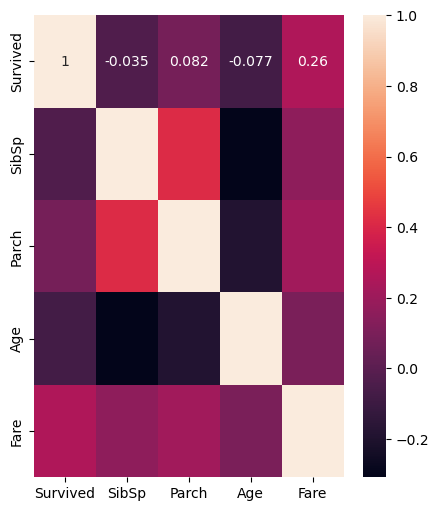

In [22]:
plt.figure(figsize = (5,6))
heatmap = sns.heatmap(data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)

## <font color = green>SibSp - Number of Siblings/Spouses aboard the ship</font>

In [10]:
data["SibSp"].nunique()

7

In [11]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<Axes: xlabel='SibSp', ylabel='Survived'>

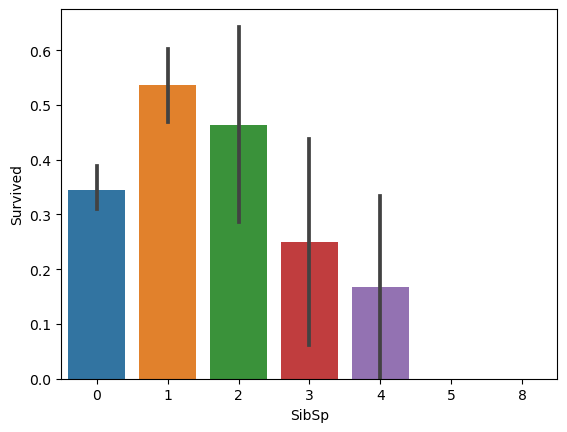

In [8]:
sns.barplot(x = "SibSp", y = "Survived", data = data)

This shows that a passenger who had more siblings had less chances of survival as they tried to save their siblings first. Therefore, people with more1 or 2 siblings had a high survival probability. 

## <font color = "green">Age</font>

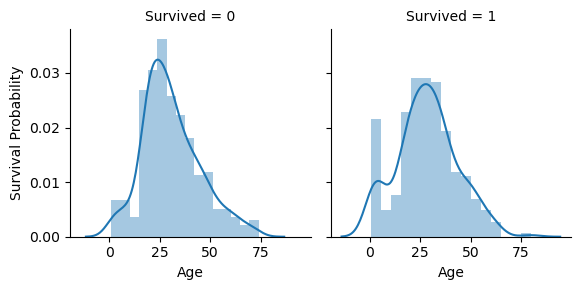

In [30]:
age_visual = sns.FacetGrid(data, col = "Survived")
age_visual = age_visual.map(sns.distplot, "Age").set_ylabels("Survival Probability")

It can be seen that the passengers who were very young had more chances of survival than their chances of dying whereas the older ones had more chances of dying rather than surviving. 

## <font color = "green">Sex</font>

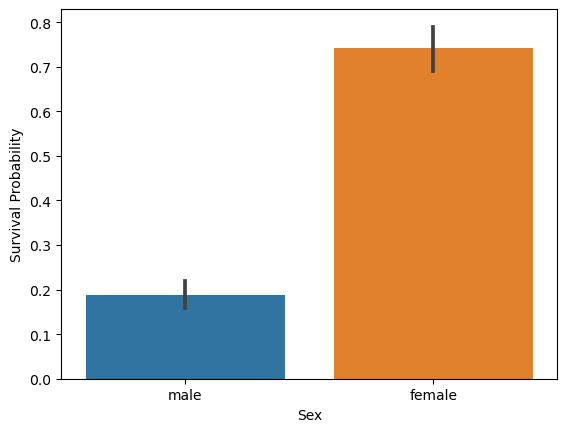

In [12]:
age_plot = sns.barplot(x = "Sex", y = "Survived", data = data).set_ylabel("Survival Probability")

In [20]:
data[["Sex", "Survived"]].groupby("Sex").mean()

Survived
Sex             
female  0.742038
male    0.188908

It can be inferred both graphically and numerically that survival probability of females was higher than that of males. Also as seen in the movie, the phrase "Women and Children first" has been repeated several times.

## <font color = "green">Pclass</font>

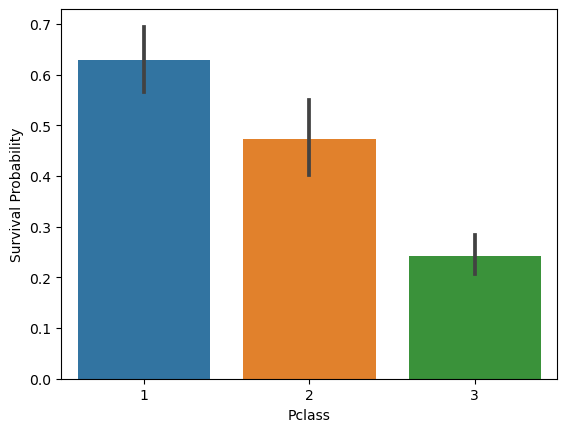

In [26]:
pclass = sns.barplot(x = "Pclass", y = "Survived", data = data)
pclass = pclass.set_ylabel("Survival Probability")

Elite class people had more chances of survival as they were given preference. 

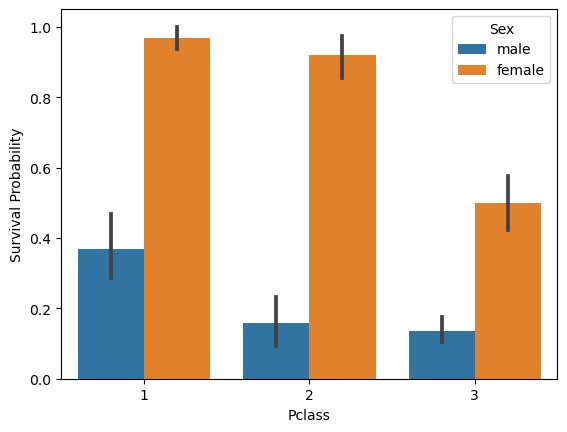

In [27]:
pclass = sns.barplot(x = "Pclass", y = "Survived", data = data, hue = "Sex")
pclass = pclass.set_ylabel("Survival Probability")

## <font color = "green">Embarked</font>

In [31]:
data["Embarked"].isnull().sum()

2

In [32]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [33]:
data["Embarked"] = data["Embarked"].fillna("S")

In [37]:
data["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [38]:
data["Embarked"].isnull().sum()

0

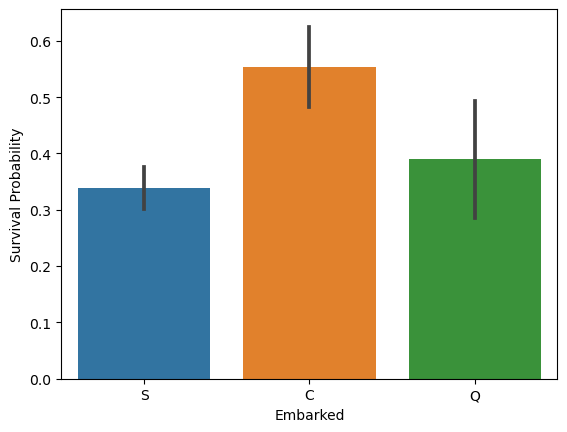

In [42]:
g = sns.barplot(x = "Embarked", y = "Survived", data = data)
g = g.set_ylabel("Survival Probability")

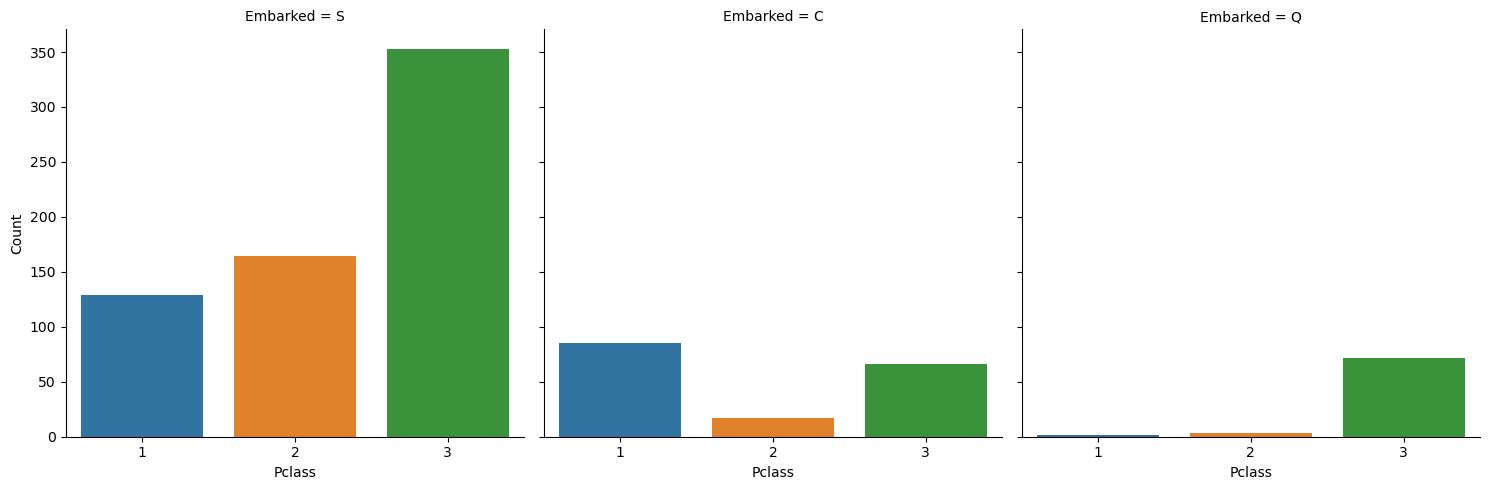

In [58]:
g = sns.catplot(x="Pclass", col="Embarked", data=data, kind="count")
g = g.set_ylabels("Count")

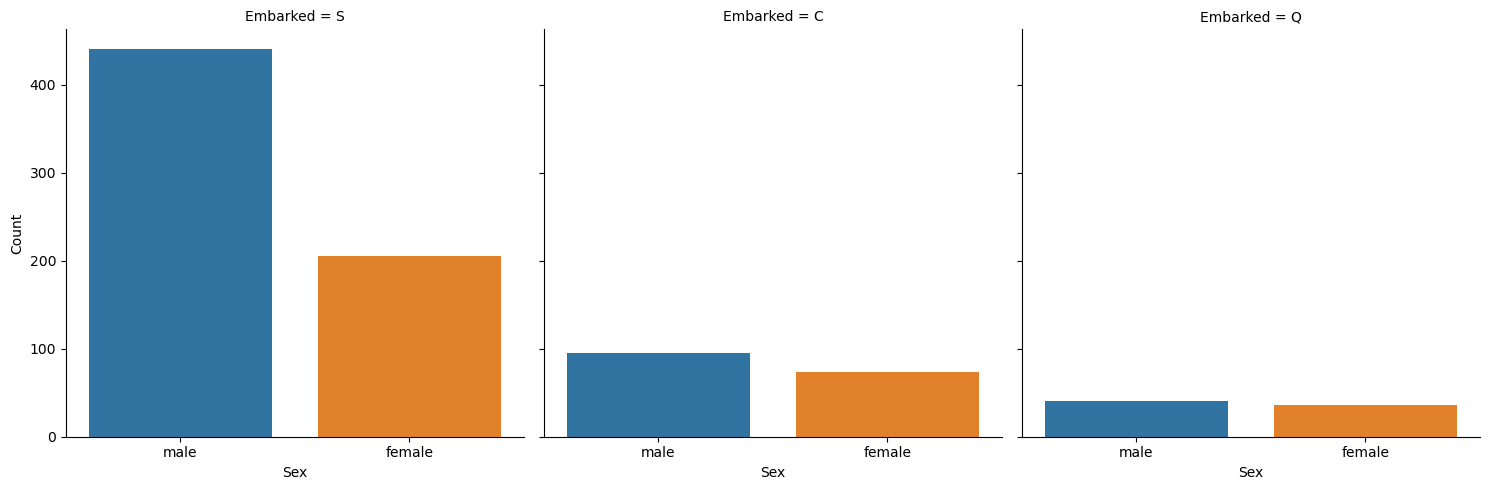

In [59]:
g = sns.catplot(x="Sex", col="Embarked", data=data, kind="count")
g = g.set_ylabels("Count")

As seen the passengers who started their journey from S mostly belonged to 3rd class and majority of them were males and hence had less survival probability. Similarly can be inferred for both Q and C stations.

# Preparing Data

In [60]:
data = pd.read_csv("titanic_data.csv")

In [61]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
print(f"Mean = {mean}, Std. Dev. = {std}, Null Values = {is_null}")

Mean = 29.69911764705882, Std. Dev. = 14.526497332334044, Null Values = 177


In [64]:
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
a = data["Age"].copy()
a[np.isnan(a)] = rand_age
data["Age"] = a

In [65]:
data["Age"].isnull().sum()

0

In [66]:
data["Embarked"] = data["Embarked"].fillna("S")

In [67]:
data["Embarked"].isnull().sum()

0

In [68]:
data.drop(["PassengerId", "Cabin", "Ticket", "Name"], axis = 1, inplace = True)

In [69]:
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [71]:
genders = {"male" : 0, "female" : 1}
data["Sex"] = data["Sex"].map(genders)

In [73]:
ports = {"S" : 0, "C" : 1, "Q" : 2}
data["Embarked"] = data["Embarked"].map(ports)

In [74]:
data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         0
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         0
3         1       1    1  35.0      1      0  53.1000         0
4         0       3    0  35.0      0      0   8.0500         0

# Splitting the data

In [78]:
x = data.drop(data.columns[[0]], axis = 1)
y = data["Survived"]

In [79]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 0)

# Scaling

In [80]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

# Classification

In [82]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators = 1000)

In [83]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

In [84]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [85]:
from sklearn.metrics import accuracy_score
logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc =accuracy_score(ytest, rf_classifier_ypred)

In [87]:
print("Logistic Regression : ", round(logreg_acc*100, 2))
print("Support Vector : ", round(svc_classifier_acc*100, 2))
print("Decision Tree : ", round(dt_classifier_acc*100, 2))
print("K-NN Classifier : ", round(knn_classifier_acc*100, 2))
print("Random Forest : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  81.34
Support Vector :  81.34
Decision Tree :  80.6
K-NN Classifier :  81.34
Random Forest :  82.84
